### TELCO CUSTOMER CHURN PREDICTION & RETENTION ANALYTICS
About This Project
A hands-on learning project exploring customer churn prediction and retention strategy development using machine learning and predictive analytics techniques.

### About the Dataset
IBM Telco Customer Churn Dataset
Dataset: Telco Customer Churn (IBM Sample Datasets)

### Learning Objectives
* Understanding customer churn patterns and identifying risk factors
* Building classification models to predict customer churn
* Performing customer risk segmentation (High/Medium/Low),
* Creating business dashboards

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 1,What does our dataset contain, and is it loaded correctly?

In [42]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded: 7043 rows × 21 columns


In [43]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies      

### 2, What are the data types of each column, and do we need any type conversions?

In [44]:
print("DATA TYPES:")
print(df.dtypes)

DATA TYPES:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### 3, Are there any missing values that need to be addressed before analysis?

In [12]:
print("\n\nMISSING VALUES:")
print(df.isnull().sum())



MISSING VALUES:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 4,What is the complete structure and feature list of dataset?

In [45]:
print("DATASET OVERVIEW")
print("/" * 10)
print(f"Total customers: {len(df):,}")
print(f"Total features (columns): {df.shape[1]}")
print(f"\nAll column names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

DATASET OVERVIEW
//////////
Total customers: 7,043
Total features (columns): 21

All column names:
  1. customerID
  2. gender
  3. SeniorCitizen
  4. Partner
  5. Dependents
  6. tenure
  7. PhoneService
  8. MultipleLines
  9. InternetService
  10. OnlineSecurity
  11. OnlineBackup
  12. DeviceProtection
  13. TechSupport
  14. StreamingTV
  15. StreamingMovies
  16. Contract
  17. PaperlessBilling
  18. PaymentMethod
  19. MonthlyCharges
  20. TotalCharges
  21. Churn


### 5, What is the overall churn rate in our customer base, and how many customers have left?

In [21]:
print("Churn Analysis")
churn_counts = df['Churn'].value_counts()
print(f"\nCustomer Count:")
print(churn_counts)
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100
retained_rate = 100 - churn_rate
print(f"\n\nChurn Rate:")
print("~" * 50)
print(f"  Churned (Left):    {churn_counts['Yes']:,} customers ({churn_rate:.1f}%)")
print(f"  Retained (Stayed): {churn_counts['No']:,} customers ({retained_rate:.1f}%)")

Churn Analysis

Customer Count:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn Rate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Churned (Left):    1,869 customers (26.5%)
  Retained (Stayed): 5,174 customers (73.5%)


### 6, How can we visualize the churn distribution to communicate the retention challenge?

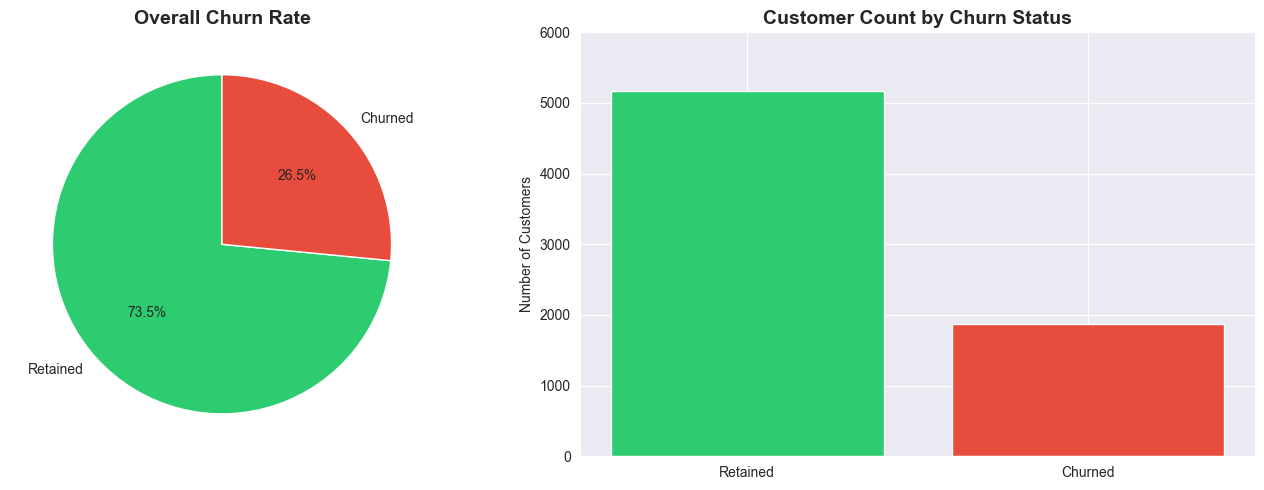

 Chart saved


In [47]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for retained, Red for churned
labels = ['Retained', 'Churned']
axes[0].pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Overall Churn Rate', fontsize=14, fontweight='bold')
axes[1].bar(labels, churn_counts, color=colors)
axes[1].set_title('Customer Count by Churn Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers')
axes[1].set_ylim(0, 6000)
plt.tight_layout()
plt.savefig('../outputs/churn_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved")


In [28]:
print("CHURN BY CONTRACT TYPE:")
print("~" * 70)
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
for contract, rate in contract_churn.items():
    count = len(df[df['Contract'] == contract])
    churned = int((df[df['Contract'] == contract]['Churn'] == 'Yes').sum())
    print(f"{contract:20} {rate:6.1f}% churn  ({churned:,}/{count:,} customers)")

print("\nKEY INSIGHT: Month-to-month contracts have MUCH higher churn")

CHURN BY CONTRACT TYPE:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Month-to-month         42.7% churn  (1,655/3,875 customers)
One year               11.3% churn  (166/1,473 customers)
Two year                2.8% churn  (48/1,695 customers)

KEY INSIGHT: Month-to-month contracts have MUCH higher churn


In [31]:
# Churn by Tenure (months as customer)
print("CHURN BY TENURE (Time as Customer):")
print("=" * 60)

# groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 72],labels=['0-6 months', '6-12 months', '1-2 years', '2+ years'])

#churn rate for each tenure group
tenure_churn = df.groupby('TenureGroup', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

#results
for tenure, rate in tenure_churn.items():
    count = len(df[df['TenureGroup'] == tenure])
    churned = int((df[df['TenureGroup'] == tenure]['Churn'] == 'Yes').sum())
    print(f"{tenure:15} {rate:6.1f}% churn  ({churned:,}/{count:,} customers)")

print("\n CRITICAL INSIGHT ")

CHURN BY TENURE (Time as Customer):
0-6 months        53.3% churn  (784/1,470 customers)
6-12 months       35.9% churn  (253/705 customers)
1-2 years         28.7% churn  (294/1,024 customers)
2+ years          14.0% churn  (538/3,833 customers)

 CRITICAL INSIGHT 


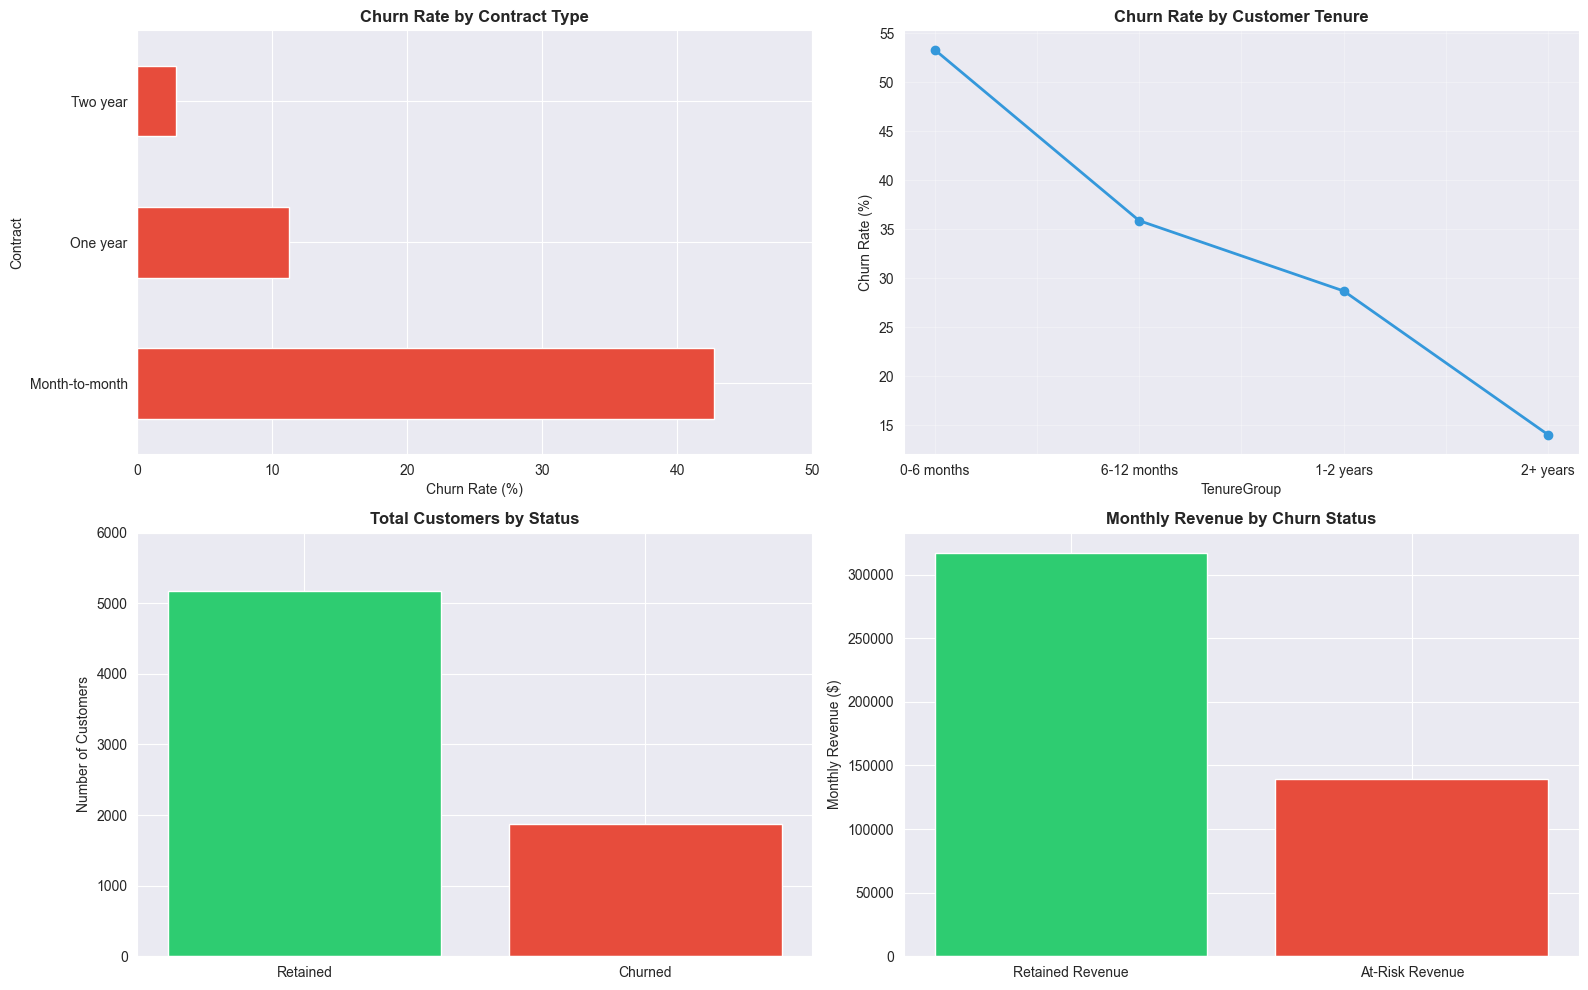

Dashboard saved


In [51]:
# 4-chart analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# CREATE TenureGroup again
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 72],labels=['0-6 months', '6-12 months', '1-2 years', '2+ years'])

# Churn by Contract Type (Top Left)
contract_churn = df.groupby('Contract', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
contract_churn.plot(kind='barh', ax=axes[0, 0], color='#e74c3c')
axes[0, 0].set_title('Churn Rate by Contract Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Churn Rate (%)')
axes[0, 0].set_xlim(0, 50)

# Churn by Tenure (Top Right)
tenure_churn = df.groupby('TenureGroup', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
tenure_churn.plot(kind='line', marker='o', ax=axes[0, 1], color='#3498db', linewidth=2)
axes[0, 1].set_title('Churn Rate by Customer Tenure', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

#  Customer Count by Churn (Bottom Left)
churn_counts = df['Churn'].value_counts()
axes[1, 0].bar(['Retained', 'Churned'], churn_counts, color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Total Customers by Status', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_ylim(0, 6000)

#Monthly Revenue by Status (Bottom Right)
churned_df = df[df['Churn'] == 'Yes']
retained_df = df[df['Churn'] == 'No']
revenue_data = [retained_df['MonthlyCharges'].sum(),churned_df['MonthlyCharges'].sum()]
axes[1, 1].bar(['Retained Revenue', 'At-Risk Revenue'], revenue_data, color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Monthly Revenue by Churn Status', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Monthly Revenue ($)')

plt.tight_layout()
plt.savefig('../outputs/churn_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("Dashboard saved")

### 7, What are the most critical insights about customer churn patterns and high-risk segments?

In [52]:
print(" KEY FINDINGS SUMMARY")
print("-" * 60)

# Overall metrics
total_customers = len(df)
churned = (df['Churn'] == 'Yes').sum()
retained = (df['Churn'] == 'No').sum()
churn_rate = (churned / total_customers) * 100

print(f"\nOVERALL CHURN:")
print(f"  Total Customers: {total_customers:,}")
print(f"  Churned: {churned:,} ({churn_rate:.1f}%)")
print(f"  Retained: {retained:,} ({100-churn_rate:.1f}%)")
print(f"\nCONTRACT TYPE IMPACT:")
contract_churn = df.groupby('Contract', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
for contract, rate in contract_churn.items():
    risk = "HIGH" if rate > 30 else "MEDIUM" if rate > 10 else "LOW"
    print(f"  [{risk:6}] {contract:20} {rate:.1f}% churn")

# Tenure findings
print(f"\nTENURE IMPACT:")
tenure_churn = df.groupby('TenureGroup', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
for tenure, rate in tenure_churn.items():
    risk = "CRITICAL" if rate > 40 else "HIGH" if rate > 25 else "LOW"
    print(f"  [{risk:8}] {tenure:15} {rate:.1f}% churn")

print(f"\nTOP 3 Insights:")
print(f"  i. Month-to-month contracts are 15x riskier than 2-year contracts")
print(f"  ii. First 6 months are CRITICAL - 53.3% churn rate")
print(f"  iii. Customer loyalty improves dramatically after 2 years")

 KEY FINDINGS SUMMARY
------------------------------------------------------------

OVERALL CHURN:
  Total Customers: 7,043
  Churned: 1,869 (26.5%)
  Retained: 5,174 (73.5%)

CONTRACT TYPE IMPACT:
  [HIGH  ] Month-to-month       42.7% churn
  [MEDIUM] One year             11.3% churn
  [LOW   ] Two year             2.8% churn

TENURE IMPACT:
  [CRITICAL] 0-6 months      53.3% churn
  [HIGH    ] 6-12 months     35.9% churn
  [HIGH    ] 1-2 years       28.7% churn
  [LOW     ] 2+ years        14.0% churn

TOP 3 Insights:
  i. Month-to-month contracts are 15x riskier than 2-year contracts
  ii. First 6 months are CRITICAL - 53.3% churn rate
  iii. Customer loyalty improves dramatically after 2 years
